# Plotting notebook
This notebook is intended to show how the circuit work and show the plots

In [1]:
from src.circuit import Circuit
import numpy as np

L = 4
circuits: list[Circuit] = []
n_circuits = 100
n_prob = 4
p = np.linspace(0, 0.5, n_prob)  # Probability of applying a unitary operator
for prob in p:
    for _ in range(n_circuits):
        circuits.append(Circuit(L, prob))
# Perform full circuit evolution
circuits = np.array(circuits)
steps = 100
entropies = np.zeros((n_circuits, steps + 1, n_prob))
for l, circuit in enumerate(circuits):
    k = l // n_circuits
    j = l % n_circuits
    entropies[j, 0, k] = circuit.state.entanglement_entropy()
    for i in range(1, steps + 1):
        circuit.full_circuit_evolution(1)
        entropies[j, i, k] = circuit.state.entanglement_entropy()

/home/pablo/projects/master/many_body_physics/project/src/state.py:80: RuntimeWarning: divide by zero encountered in log2
  entropy_terms = np.where(diag > 0, diag * np.log2(diag), 0)
/home/pablo/projects/master/many_body_physics/project/src/state.py:80: RuntimeWarning: invalid value encountered in multiply
  entropy_terms = np.where(diag > 0, diag * np.log2(diag), 0)


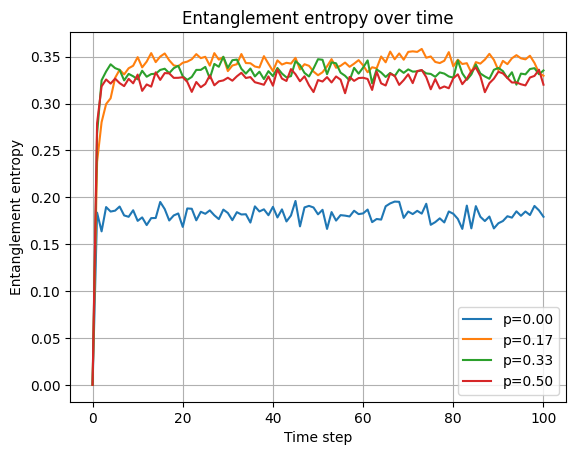

In [2]:
import matplotlib.pyplot as plt

for k in range(n_prob):
    plt.plot(np.average(entropies[:, :, k], axis=0) / L, label=f"p={p[k]:.2f}")
plt.xlabel("Time step")
plt.ylabel("Entanglement entropy")
plt.title("Entanglement entropy over time")
plt.legend()
plt.grid()

In [ ]:
np.average(
    entropies[
        :,
        :,
    ],
    axis=0,
) 

array([[0.        , 0.        , 0.        , 0.        ],
       [0.73475524, 0.95175237, 1.07169522, 1.11654065],
       [0.65492457, 1.12061006, 1.29938001, 1.27339506],
       [0.75857721, 1.19792652, 1.33692305, 1.30279558],
       [0.73947553, 1.22266424, 1.36749464, 1.28521911],
       [0.74325731, 1.30958498, 1.35120859, 1.30649137],
       [0.76091718, 1.3443736 , 1.34357338, 1.28725141],
       [0.7229276 , 1.32430957, 1.29892709, 1.27442228],
       [0.71709   , 1.3506379 , 1.32664812, 1.30548497],
       [0.74499383, 1.36138489, 1.31657087, 1.28650304],
       [0.69968465, 1.39807622, 1.30332383, 1.32371797],
       [0.71451125, 1.35443602, 1.33999857, 1.25428215],
       [0.68178462, 1.37909744, 1.31452963, 1.28162581],
       [0.71146514, 1.4152762 , 1.32575842, 1.27227351],
       [0.71197467, 1.37682823, 1.32739947, 1.33336466],
       [0.78037834, 1.40041222, 1.34352787, 1.30105724],
       [0.7500192 , 1.41371381, 1.34868981, 1.33003419],
       [0.7013791 , 1.38458387,

In [4]:
np.average(
    entropies[
        :,
        :,
    ],
    axis=0,
) 

array([[0.        , 0.        , 0.        , 0.        ],
       [0.73475524, 0.95175237, 1.07169522, 1.11654065],
       [0.65492457, 1.12061006, 1.29938001, 1.27339506],
       [0.75857721, 1.19792652, 1.33692305, 1.30279558],
       [0.73947553, 1.22266424, 1.36749464, 1.28521911],
       [0.74325731, 1.30958498, 1.35120859, 1.30649137],
       [0.76091718, 1.3443736 , 1.34357338, 1.28725141],
       [0.7229276 , 1.32430957, 1.29892709, 1.27442228],
       [0.71709   , 1.3506379 , 1.32664812, 1.30548497],
       [0.74499383, 1.36138489, 1.31657087, 1.28650304],
       [0.69968465, 1.39807622, 1.30332383, 1.32371797],
       [0.71451125, 1.35443602, 1.33999857, 1.25428215],
       [0.68178462, 1.37909744, 1.31452963, 1.28162581],
       [0.71146514, 1.4152762 , 1.32575842, 1.27227351],
       [0.71197467, 1.37682823, 1.32739947, 1.33336466],
       [0.78037834, 1.40041222, 1.34352787, 1.30105724],
       [0.7500192 , 1.41371381, 1.34868981, 1.33003419],
       [0.7013791 , 1.38458387,

In [5]:
entropies[0, :, 0]

array([-0.        ,  0.36840764,  0.95669484,  0.6987228 ,  0.94534109,
        0.64863922,  0.81061483,  0.96992171,  0.6960888 ,  0.70128013,
        0.86159947,  0.87477259,  0.63344556,  0.42331809,  0.54380181,
        0.52018678,  0.95520711,  0.99677403,  0.84898356,  0.84153152,
        0.9086234 ,  0.65278555,  0.09824847,  0.9858719 ,  0.6667351 ,
        0.61452167,  0.40886879,  0.54049515,  0.96984479,  0.73579867,
        0.43108817,  0.51605628,  0.77916468,  0.98119343,  0.99999567,
        0.79371623,  0.62485485,  0.76466426,  0.98803149,  0.98834631,
        0.29581786,  0.70773548,  0.99120292,  0.97997934,  0.27143366,
        0.99433557,  0.10559415,  0.91136953,  0.90200413,  0.47218258,
        0.97746311,  0.99821366,  0.99486638,  0.98898507,  0.9720978 ,
        0.96628791,  0.38298204,  0.87789023,  0.3439199 ,  0.11288891,
        0.65759626,  0.93979127,  0.68267641,  0.93984294,  0.85527413,
        0.99992979,  0.61832783,  0.98406765,  0.59546443,  0.61